# CS 5483 Network Science

## Project 3 Fall 2021

### Himadri Sen Gupta

In [1]:
# Required Header
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

#Importing time for caltulating the required time to run program 
import time  

#### Question 1

a) Create a random undirected graph G with 40 nodes and probability 0.35

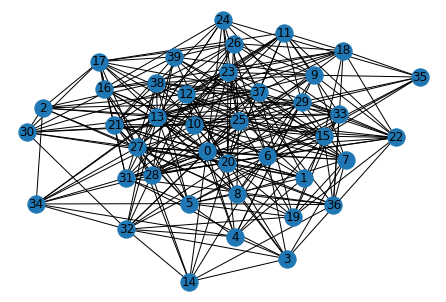

In [2]:
G = nx.fast_gnp_random_graph(40,0.35)

#Drawing the network G
nx.draw(G,with_labels=True)

b) Compute Closeness Centrality two ways:
    - Using Networkx Library

In [3]:
print("Determining the Closeness centrality of the above graph")
print("----------------------------------------------------")

#Calculating centrality using networkx
centrality = nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)

#Printing centrality
for v, c in centrality.items():
    print(f"{v:2} {c:.3f}")


Determining the Closeness centrality of the above graph
----------------------------------------------------
 0 0.696
 1 0.574
 2 0.565
 3 0.574
 4 0.582
 5 0.609
 6 0.661
 7 0.600
 8 0.582
 9 0.609
10 0.609
11 0.600
12 0.600
13 0.639
14 0.557
15 0.619
16 0.582
17 0.609
18 0.591
19 0.574
20 0.709
21 0.609
22 0.609
23 0.619
24 0.582
25 0.684
26 0.609
27 0.650
28 0.609
29 0.600
30 0.574
31 0.609
32 0.600
33 0.619
34 0.574
35 0.557
36 0.574
37 0.639
38 0.619
39 0.582


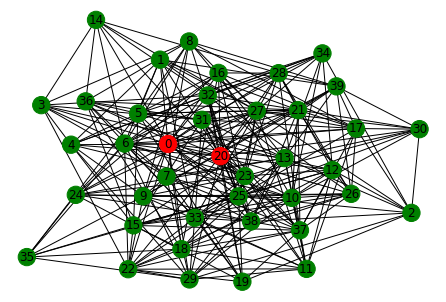

In [4]:
#Identifying the largest two
sort_list = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

#Coloring the highest centrality nodes
color_map = []
for node in G:
    if (node == sort_list[0][0]) or (node== sort_list[1][0]):
        color_map.append('red')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)

b) Compute Closeness Centrality two ways:
    - Write a function to compute closeness centrality using the mean shortest path distances.

In [5]:
print("Determining the Closeness centrality of the above graph")
print("----------------------------------------------------")
for i in G.nodes: 
    
    #Get the path of each shortest path from origin i
    path = nx.single_source_shortest_path(G, i)  
    
    #Creating this blank for keep the lengh of all shortest path 
    total = []
    for j in G.nodes: 
        total.append(len(path[j])-1)
    
    #Taking sum of all the shortest path from one node 
    total_len = sum(total)
    
    #Finding Closeness Centrality of all the nodes
    c_i = (40-1)/total_len
    
    #Printing centrality
    print(f"{i} {c_i}")

Determining the Closeness centrality of the above graph
----------------------------------------------------
0 0.6964285714285714
1 0.5735294117647058
2 0.5652173913043478
3 0.5735294117647058
4 0.582089552238806
5 0.609375
6 0.6610169491525424
7 0.6
8 0.582089552238806
9 0.609375
10 0.609375
11 0.6
12 0.6
13 0.639344262295082
14 0.5571428571428572
15 0.6190476190476191
16 0.582089552238806
17 0.609375
18 0.5909090909090909
19 0.5735294117647058
20 0.7090909090909091
21 0.609375
22 0.609375
23 0.6190476190476191
24 0.582089552238806
25 0.6842105263157895
26 0.609375
27 0.65
28 0.609375
29 0.6
30 0.5735294117647058
31 0.609375
32 0.6
33 0.6190476190476191
34 0.5735294117647058
35 0.5571428571428572
36 0.5735294117647058
37 0.639344262295082
38 0.6190476190476191
39 0.582089552238806


c) Compute Eigen Vector Centrality for graph G.

    - Using Networkx library.
    - Write code to find the position of the largest eigenvalue and the eigenvectors of the graph

In [6]:
#Using Networkx library
print("Determining the Eigenvector centrality of the above graph")
print("----------------------------------------------------")

#Calculating Eigen Vector Centrality for graph G
centrality = nx.eigenvector_centrality(G,max_iter=1000)

#Priting Centrality 
for v, c in centrality.items():
    print(f"{v:2} {c:.3f}")

Determining the Eigenvector centrality of the above graph
----------------------------------------------------
 0 0.249
 1 0.123
 2 0.110
 3 0.109
 4 0.121
 5 0.136
 6 0.207
 7 0.144
 8 0.122
 9 0.153
10 0.159
11 0.157
12 0.148
13 0.176
14 0.101
15 0.154
16 0.137
17 0.162
18 0.136
19 0.120
20 0.258
21 0.158
22 0.171
23 0.184
24 0.135
25 0.231
26 0.163
27 0.197
28 0.166
29 0.151
30 0.121
31 0.163
32 0.148
33 0.171
34 0.106
35 0.091
36 0.120
37 0.200
38 0.167
39 0.114


The largest eigen value exist in the node:  20


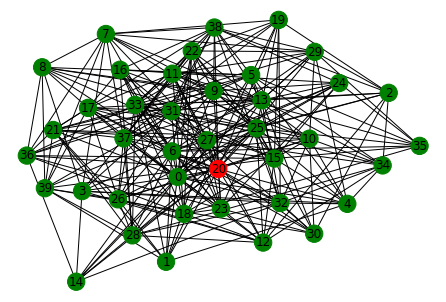

In [7]:
#Find out the largest eigenvalue and the eigenvectors of the graph
sort_list = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

print("The largest eigen value exist in the node: ", sort_list[0][0])

color_map = []
for node in G:
    if (node == sort_list[0][0]):
        color_map.append('red')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)

#### Question 2

In this question you will read a graph from the edgelist file, the file consits of (u, v, w). Where (u, v) represents the edge, and w represents the weight of the edge.

In [8]:
# Read unweighted graph
import numpy as np
import networkx as nx

def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

# Read weighted graph
def read_graph_weighted(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

'''
fb = read_graph(fileName)
n = len(fb)
m = len(fb.edges())
n, m
'''


'\nfb = read_graph(fileName)\nn = len(fb)\nm = len(fb.edges())\nn, m\n'

a). Compute all pair shortest path using the Floyd-Warshall algorithm mentioned in the class (powerpoint). (You may use networkx only for verification).

    - Compare the time required to execute your algorithm with the networkx library
    - Compute the algorithm for the graph (data.txt) as well as the karate graph from snap (https://networkrepository.com/soc-karate.php)
    - Make sure to use .gz file to load the data, do not uncompress.

In [9]:
#Floyd-Warshall algorithm in function 

def floyd_Warshall(matrix, nodes):
    for k in range(nodes):
        for i in range(nodes):
            for j in range(nodes):
                #updateing the value of the matrix based on floyd warshall method
                matrix[i,j] = min(int(matrix[i,j]), (int(matrix[i,k]) + int(matrix[k,j])))
    #return the pair shortest path matrix
    return matrix

In [10]:
#Reading the weighted graph 
data = read_graph_weighted("data.txt.gz")

#Creating adjacency matrix
adjacency_matrix = nx.adjacency_matrix(data)
adjacency_matrix = adjacency_matrix.todense()

#Assume that num is a very large number or Infinity 
num = 10000000

#Making the numbers infinity where it was 0
adjacency_matrix[adjacency_matrix == 0] = num

#Then filling the diagonal with 0
np.fill_diagonal(adjacency_matrix, 0)

#n is the number of nodes in the data graph
n = data.number_of_nodes()

#Start the counting time 
start = time.time()

#Run the algorithom
floyd_Warshall(adjacency_matrix,n)

#Find out the time for running the algorithom by function 
execution_time = time.time() - start

print("The Execution Time Using Function: ", execution_time, "seconds")

The Execution Time Using Function:  0.05674004554748535 seconds


In [11]:
#Reading the weighted graph 
data = read_graph_weighted("data.txt.gz")

#Start the counting time 
start = time.time()

#Run the algorithom
nx.floyd_warshall(data, weight='weight')

#Find out the time for running the algorithom by function 
execution_time = time.time() - start

print("The Execution Time Using Networkx Library: ", execution_time, "seconds")

The Execution Time Using Networkx Library:  0.029894351959228516 seconds


In [12]:
#Reading the unweighted graph 
data_1 = read_graph("soc-karate.txt.gz")

#Creating adjacency matrix
adjacency_matrix_1 = nx.adjacency_matrix(data)
adjacency_matrix_1 = adjacency_matrix_1.todense()

#Assume that num is a very large number or Infinity 
num = 10000000

#Making the numbers infinity where it was 0
adjacency_matrix_1[adjacency_matrix_1 == 0] = num

#Then filling the diagonal with 0
np.fill_diagonal(adjacency_matrix_1, 0)

#n is the number of nodes in the data graph
n = data.number_of_nodes()

#Start the counting time 
start = time.time()

#Run the algorithom
floyd_Warshall(adjacency_matrix_1,n)


#Find out the time for running the algorithom by function 
execution_time = time.time() - start

print("The Execution Time Using Function: ", execution_time, "seconds")

The Execution Time Using Function:  0.06032681465148926 seconds


In [13]:
#Reading the weighted graph 
data_1 = read_graph("soc-karate.txt.gz")

#Start the counting time 
start = time.time()

#Run the algorithom
nx.floyd_warshall(data_1, weight='weight')

#Find out the time for running the algorithom by function 
execution_time = time.time() - start

print("The Execution Time Using Networkx Library: ", execution_time, "seconds")

The Execution Time Using Networkx Library:  0.016900300979614258 seconds


### Comment: 

#### After running the algorithom with two different method, we can say that networkx takes less time to execute compared to my manually prepared functions.

b) Using the Ford-Fulkerson theorem, compute the Max-Flow for the graph "data.txt", from source = 0, and sink = 29

In [14]:
#Chaning the adjacency matrix to array 
result = np.array(adjacency_matrix)

In [15]:
#Breadth-first search algorithom
def breadth_first_search(graph, num_node, s, t, parent):

    # Identify the nodes which are not visited
    visit_node = [False]*(num_node)
    
    list_bfs = []
    
    #Source node is visted and add it in the list
    list_bfs.append(s)
    visit_node[s] = True
    
    while list_bfs:
        #poping one from the list
        u = list_bfs.pop(0)
        for index, value in enumerate(graph[u]):
            if visit_node[index] == False and value > 0:
                list_bfs.append(index)
                visit_node[index] = True
                parent[index] = u
                if index == t:
                    return True
    return False

In [16]:
# Ford-Fulkerson theorem APPLICATION 
def ford_fulkerson(graph, num_node, source, sink):
    
    #Taking this 0 at first then will add 
    maximum_flow = 0
    
    # For storing th path by BFS
    parent = [-1]*(num_node)


    while breadth_first_search(graph, num_node, source, sink, parent):
        
        path_flow = float("Inf")
        s = sink
        
        while(s !=  source):
            path_flow = min (path_flow, graph[parent[s]][s])
            s = parent[s]

        #Adding math flow to maximum flow to get ultimate flow 
        maximum_flow =  maximum_flow + path_flow

        v = sink
        while(v !=  source):
            u = parent[v]
            graph[u][v] = graph[u][v] - path_flow
            graph[v][u] = graph[v][u] + path_flow
            v = parent[v]

    #Now returning the MAX-FLOW of the graph 
    return maximum_flow

#Using the Ford-Fulkerson theorem, compute the Max-Flow for the graph "data.txt", from source = 0, and sink = 29
print ("\n\nThe Max-Flow for the graph data.txt from source = 0, and sink = 29 is ::", ford_fulkerson(result, n, 0, 29))



The Max-Flow for the graph data.txt from source = 0, and sink = 29 is :: 166
